# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [44]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from scipy import stats
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations. However, some of the observations are missing data

#### Question 2. Create a summary table

In [19]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 

The GRE has a much wider range of potential scores - GRE: (220 to 800) vs GPA: (2.26 to 4.00) 

A wider range of values would increase the standard deviation because the standard deviation is calculated based on the sum of squared differences from the mean of the distribution. 

#### Question 4. Drop data points with missing data


In [7]:
df_clean = df_raw.dropna()
df_clean.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [63]:
#print df_clean.describe()
nullTable = df_clean.isnull()
count = 0
for col in nullTable:
    for v in nullTable[col]:
        if v:
            count +=1
print 'Number of empty values: ' + str(count)

df_clean.describe()

Number of empty values: 0


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: 

When there are null data, the calculation for percentiles cannot be calculated. Now that the null data has been removed df.describe() returns values for all percentiles. 

Another simple way to tell is to use df.isnull(). This returns an array with booleans identifying null values. 

#### Question 6. Create box plots for GRE and GPA

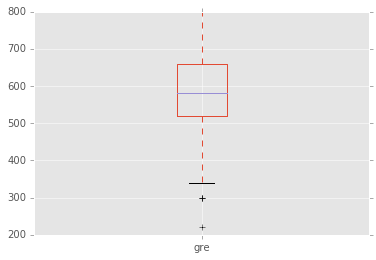

In [27]:
#boxplot 1
plt.style.use('ggplot')
df_clean[['gre']].plot(kind='box');

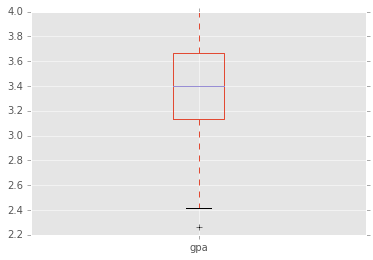

In [31]:
#boxplot 2 
df_clean[['gpa']].plot(kind='box');

#### Question 7. What do these plots show?

Answer: 

These plots show a simple visualization of the distribution of the variable. These box plots display the median, 1st quartile, 3rd quartile, minimum, maximum, and outliers of the distribution.

#### Question 8. Describe each distribution 

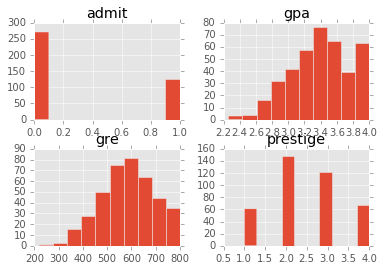

In [66]:
# plot the distribution of each variable 
df_clean.hist();

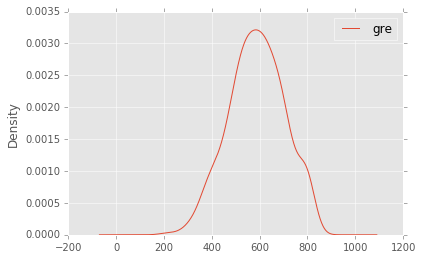

In [92]:
df_clean[['gre']].plot(kind='density');

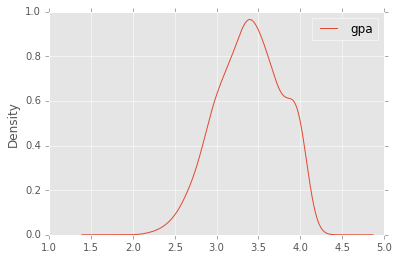

In [98]:
# plot the distribution of each variable 
df_clean[['gpa']].plot(kind='density');

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [82]:
normtestGRE, normtestGPA = stats.normaltest(df_clean['gre']),stats.normaltest(df_clean['gpa'])
print 'GRE TEST: ' + str(normtestGRE)
print 'GPA TEST: ' + str(normtestGPA)
n = stats.normaltest(df_clean)
print n
stats.normaltest(np.log(df_clean['gre']))

GRE TEST: NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)
GPA TEST: NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)
NormaltestResult(statistic=array([ 2203.82079872,     3.81798293,    13.07987556,    49.42125322]), pvalue=array([  0.00000000e+00,   1.48229806e-01,   1.44457838e-03,
         1.85486036e-11]))


NormaltestResult(statistic=39.990354623098256, pvalue=2.0711179322772041e-09)

Answer: 

According to the normal test, the distribution of GRE scores most likely follows a normal distribution while the GPA, admit, and prestige unlikely follows a normal distribution. 

Admit should not follow a normal distribution as it is a categorical.

null H := The distribution of the random variable follows the normal distribution

alternative H := The distribution of the random variable unlikely follows the normal distribution if the p-value <= .05 


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

If one assumed that GPA would follow a normal distribution, the assumption would be wrong based on the normalcy omnibus test. 

The distribution appears to have a few outliers that are potentially throwing off the distribution. Removing these outliers would correct the problem, and we could retest that the distribution follows a normal distribution upon removing the outliers. 


#### Question 11. Which of our variables are potentially colinear? 

In [110]:
# create a correlation matrix for the data
print df_clean.corr()


lm = sm.formula.ols(formula='gpa ~ gre', data = df_clean).fit()
lm.summary()

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Sun, 02 Oct 2016   Prob (F-statistic):           2.84e-15
Time:                        19:41:40   Log-Likelihood:                -147.52
No. Observations:                 397   AIC:                             299.0
Df Residuals:                     395   BIC:                             307.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6536      0.092     28.996      0.000         2.474     2.834
gre            0.0013      0.000      8.225      0.000         0.001     0.002
==============================================================================
Omnibus:                        6.571   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.116
Skew:                          -0.251   Prob(JB):                       0.0470
Kurtosis:                       2.656   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 12. What did you find?

Answer: 

It appears the greatest colinearity is exhibited between GPA and GRE scores. The correlation between the GRE and GPA is about 0.38 

This does not suggest a strong linear relationship, but it does suggest that there is a slight linear movement between GPA and GRE scores.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1) Create summary statistics for admit and prestige ranking

2) Break out the count of admitted students vs rejected students for each prestige level 

3) Graph a histogram of the distribution of admit and prestige 

4) Transform the prestige level into a dummy variable for each prestige level except 1 (n -1 levels of prestige) 

5) Run various classification algoritm such as logistic regression against each prestige level. So for prestige of level 1 -> run a logistic regression against gre scores and acceptance. In this case, there will be a decision boundary between admit and rejection. 

#### Question 14. What is your hypothesis? 

Answer: 

The higher the level of prestige the higher the chance that a candidate will be admitted given the same GRE score or GPA.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data